In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.autograd import Variable

import math, random, sys
import pandas as pd
from collections import deque
import rdkit
import rdkit.Chem as Chem
from rdkit.Chem import Draw, PandasTools

from jtnn import *

In [2]:
lg = rdkit.RDLogger.logger() 
lg.setLevel(rdkit.RDLogger.CRITICAL)

In [3]:
hidden_size = 450
latent_size = 56
depth = 56
nsample = 10
stereo = True 
vocab_path = 'data/vocab.txt'
model_path = 'MPNVAE-h450-L56-d3-beta0.005/model.iter-4'

In [4]:
vocab = [x.strip("\r\n ") for x in open(vocab_path)] 
vocab = Vocab(vocab)

**Загрузка модели**

In [6]:
model = JTNNVAE(vocab, hidden_size, latent_size, depth, stereo=stereo)
load_dict = torch.load(model_path, map_location=torch.device('cpu'))
missing = {k: v for k, v in model.state_dict().items() if k not in load_dict}
load_dict.update(missing) 
model.load_state_dict(load_dict)

<All keys matched successfully>

**Генерация молекул**

In [7]:
smiles = []
torch.manual_seed(0)
for i in xrange(nsample):
    mol = model.sample_prior(prob_decode=False)
    smiles.append(mol)
    print mol

COc1ncc(C)c(C(=O)NCc2cccc(Br)c2)n1
Cc1noc(CC(=O)N2CCCOC[C@H]2C(C)C)n1
CC(=O)N1CCC=C1CC(=O)N[C@]12C=CC=C[C@@H]1CCCC2
CNC(=O)[C@H]1Nc2ccccc2S[C@@]1(N)c1cocc1C
Cc1[nH]ncc1NC(=O)c1ccc(OCC(N)=O)cc1
C[C@H]1CC[C@@H](NC(=O)Cc2cncc(N)c2)C[NH2+]1
CCCN(C)[C@@H](C=O)CNc1ccc2c(c1C#N)NC=CO2
CCNS(=O)(=O)c1ccc(C(=O)N2CCOC[C@H]2C)cc1
COc1cc(C(=O)NCc2ccc3c(c2)OCO3)ccn1
CC(=O)N1CCC=C1C(=O)Oc1ccccc1C(F)F


**Визуализация**

In [8]:
df = pd.DataFrame({'smiles': smiles})
PandasTools.AddMoleculeColumnToFrame(df, 'smiles', 'mol')

In [9]:
svg = Draw.MolsToGridImage(df['mol'], molsPerRow=2, legends=smiles, subImgSize=(350, 350))

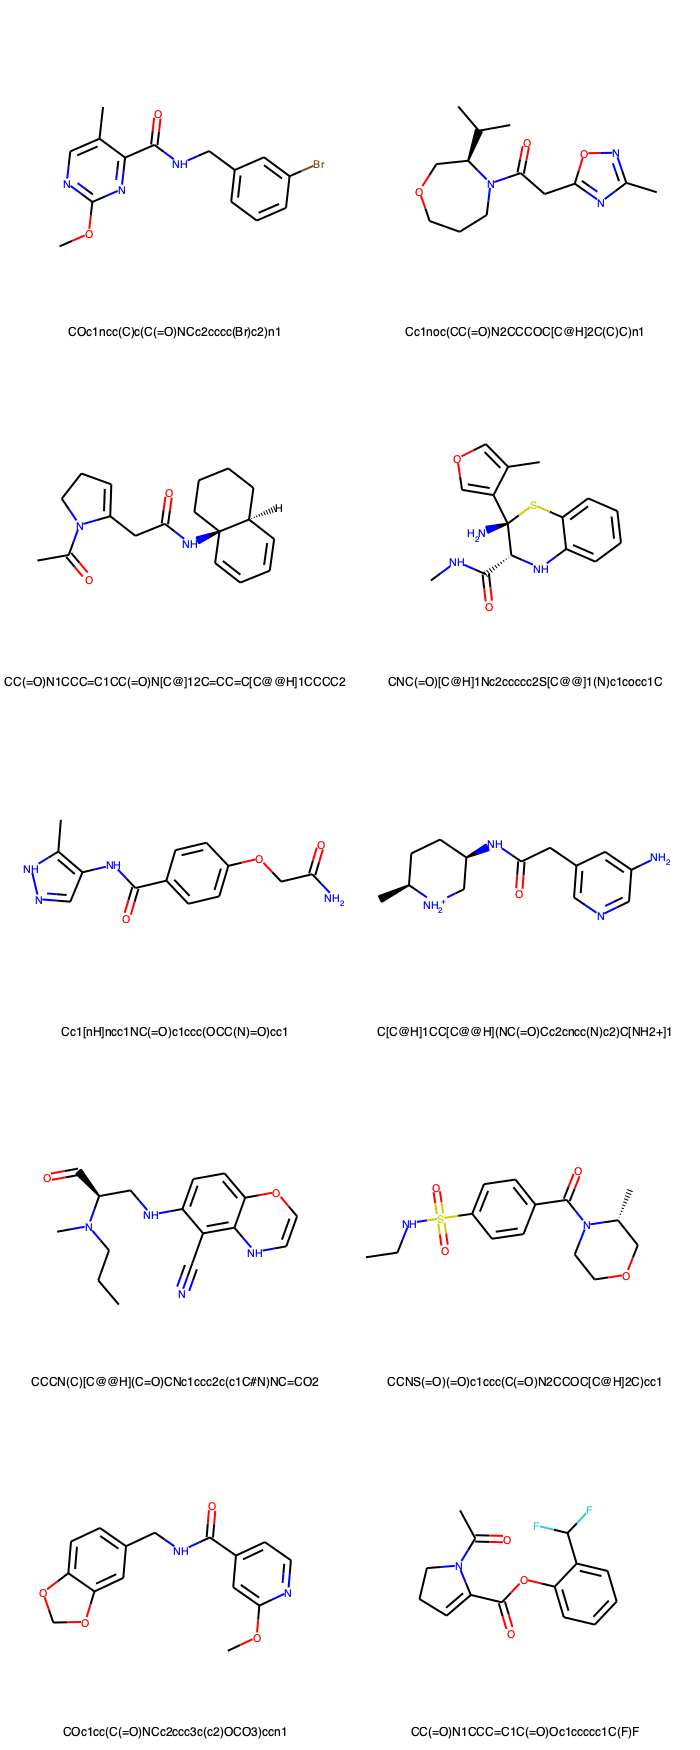

In [10]:
svg